# sklearn当中特征矩阵必须是二维

# 数据预处理

## 1数据无量纲化

### preprocessing.MinMaxScaler

In [1]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
#不太熟悉numpy的小伙伴，能够判断data的结构吗？
#如果换成表是什么样子？
data

[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [0]:
import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [2]:
#实现归一化
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(data) #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(data) #通过接口导出结果
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [3]:
result_ = scaler.fit_transform(data) #训练和导出结果一步达成
scaler.inverse_transform(result) #将归一化后的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [4]:
#使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler(feature_range=[5,10]) #依然实例化 将数据归一化到[5,10]
result = scaler.fit_transform(data) #fit_transform一步导出结果
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [0]:
#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了
#此时使用partial_fit作为训练接口
scaler = scaler.partial_fit(data)
scaler

MinMaxScaler(copy=True, feature_range=[5, 10])

####  使用numpy来实现归一化

In [7]:
import numpy as np
np.array(data).min(axis=0)

array([-1.,  2.])

In [8]:
np.array(data).max(axis=0)

array([ 1., 18.])

In [9]:
import numpy as np
X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
#归一化
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# 对每一列数据求最小值
X_nor

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [10]:

#逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

### preprocessing.StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
stdscaler = StandardScaler() #实例化
stdscaler.fit(data) #fit，本质是生成均值和方差

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
stdscaler.mean_ #查看均值的属性mean_

array([-0.125,  9.   ])

In [14]:
stdscaler.var_ #查看方差的属性var_

array([ 0.546875, 35.      ])

In [0]:
# stdscaler.std_ 
# AttributeError: 'StandardScaler' object has no attribute 'std_'

In [19]:
x_std = stdscaler.transform(data) #通过接口导出结果
x_std

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [20]:
x_std.mean() #导出的结果是一个数组，用mean()查看均值

0.0

In [21]:
x_std.std() #用std()查看方差

1.0

In [22]:
stdscaler.fit_transform(data) #使用fit_transform(data)一步达成结果

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [23]:
stdscaler.inverse_transform(x_std) #使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

#### numpy实现std

In [26]:
X

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [29]:
X_mean = X.mean(axis=0)
X_mean

array([-0.125,  9.   ])

In [31]:
X_std = X.std(axis=0)
X_std

array([0.73950997, 5.91607978])

In [32]:
Xs = (X-X_mean)/X_std
Xs

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [34]:
Xs.mean(axis =0)

array([0., 0.])

In [36]:
Xs.std(axis=0)

array([1., 1.])

In [48]:
Xs.var(axis=1)

array([0., 0., 0., 0.])

###  preprocessing.scale

使用sklearn.preprocessing.scale()函数，可以直接将给定数据进行标准化，但不能保存参数，即不能对测试集进行转换

In [25]:
from sklearn import preprocessing
preprocessing.scale(X)
#axis =0 . 如果为0，则独立标准化每个特征，否则（如果1）标准化每个样本

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

## 2缺失值

In [0]:
import pandas as pd
data = pd.read_csv("./Narrativedata.csv",index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


### impute.SimpleImputer

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [0]:
#填补年龄
Age = data.loc[:,"Age"].values.reshape(-1,1) #sklearn当中特征矩阵必须是二维
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [0]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer() #实例化，默认均值填补
imp_median = SimpleImputer(strategy="median") #用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) #用0填补


In [0]:
imp_0

SimpleImputer(copy=True, fill_value=0, missing_values=nan,
       strategy='constant', verbose=0)

In [0]:
imp_mean = imp_mean.fit_transform(Age) #fit_transform一步完成调取结果
imp_median = imp_median.fit_transform(Age)

In [0]:
imp_0 = imp_0.fit_transform(Age)
imp_0

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [ 0.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [ 0.  ],
       [31.  ],
       [ 0.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [ 0.  ],
       [19.  ],
       [ 0.  ],
       [ 0.  ],
       [40.  ],
       [ 0.  ],
       [ 0.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [ 0.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [ 0.  ],
       [ 3.  ],
       [19.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [ 0.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [0]:
imp_mean[:20]


array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765]])

In [0]:
imp_median[:20]


array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [28.],
       [31.],
       [28.]])

In [0]:
imp_0[:20]


array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [ 0.],
       [31.],
       [ 0.]])

In [0]:
#在这里我们使用中位数填补Age
data.loc[:,"Age"] = imp_median
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [0]:
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


#### 用Pandas和Numpy进行填补其实更加简单

In [0]:
import pandas as pd
data = pd.read_csv(r"Narrativedata.csv",index_col=0)
data.head()


,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [0]:
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
data.dropna(axis=0,inplace=True)
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
Age         889 non-null float64
Sex         889 non-null object
Embarked    889 non-null object
Survived    889 non-null object
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


## 3处理分类型特征：编码与哑变量

### LabelEncoder标签专用

In [0]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1] #要输入的是标签，不是特征矩阵，所以允许一维
le = LabelEncoder() #实例化
le = le.fit(y) #导入数据
label = le.transform(y) #transform接口调取结果

In [0]:
le.classes_ #属性.classes_查看标签中究竟有多少类别

array(['No', 'Unknown', 'Yes'], dtype=object)

In [0]:
label #查看获取的结果label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [0]:
le.fit_transform(y) #也可以直接fit_transform一步到位


array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [0]:
le.inverse_transform(label) #使用inverse_transform可以逆转


array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'Unknown',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Unknown', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [0]:
data.iloc[:,-1] = label #让标签等于我们运行出来的结果
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [0]:
#如果不需要教学展示的话我会这么写：
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])

### preprocessing.OrdinalEncoder：特征专用，能够将分类特征转换为分类数值

In [0]:
from sklearn.preprocessing import OrdinalEncoder
#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
data_ = data.copy()
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [0]:
OrdinalEncoder().fit(data_.iloc[:,1:3]).categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [0]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


### preprocessing.OneHotEncoder：独热编码，创建哑变量

In [0]:
data.head()


,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [0]:
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [0]:
#依然可以直接一步到位，但为了给大家展示模型属性，所以还是写成了三步
OneHotEncoder(categories='auto').fit_transform(X).toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [0]:
#依然可以还原
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
5,male,Q
6,male,S
7,male,S
8,female,S
9,female,C


In [0]:
enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [0]:
result


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [0]:
result.shape

(889, 5)

In [0]:
#axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0


In [0]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.columns =["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


##  4处理连续型特征：二值化与分段

### sklearn.preprocessing.Binarizer

In [0]:
#将年龄二值化
data_2 = data.copy()
from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1) #类为特征专用，所以不能使用一维数组
transformer = Binarizer(threshold=30).fit_transform(X)
transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

### preprocessing.KBinsDiscretizer

In [0]:
import pandas as pd
data = pd.read_csv("./Narrativedata.csv"
                   ,index_col=0
                  )
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [0]:
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
data.dropna(axis=0,inplace=True)

In [0]:
from sklearn.preprocessing import KBinsDiscretizer
X = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [0]:
#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(X).ravel())


{0.0, 1.0, 2.0}

In [0]:
est1 = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
re1 = est1.fit_transform(X).toarray()

In [0]:
est1.bin_edges_
# 每个箱子的边缘

array([array([ 0.42      , 26.94666667, 53.47333333, 80.        ])],
      dtype=object)

In [0]:
data.loc[:,"Age"].min()

0.42

In [0]:
data.loc[:,"Age"].max()

80.0

In [0]:
newdata = pd.concat([data,pd.DataFrame(re1)],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2
0,22.0,male,S,No,1.0,0.0,0.0
1,38.0,female,C,Yes,0.0,1.0,0.0
2,26.0,female,S,Yes,1.0,0.0,0.0
3,35.0,female,S,Yes,0.0,1.0,0.0
4,35.0,male,S,No,0.0,1.0,0.0


In [0]:
est2 = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform')
est2.fit_transform(X)

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

# 特征选择 feature_selection

### var

numpy与pandas中的var使用方法不同一样
numpy中，var的axis默认为None，是对所有数据进行求var

dataframe的var的axis默认为0，是对每一列数据进行求var
所以datasam.var(axis=0)==datasam.var()

In [0]:
import numpy as np
import pandas as pd
datasam = pd.read_csv(r"./sample_data/mnist_train_small.csv",header=None)

In [50]:
datasam.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
datasam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


In [0]:
datasam.var()

In [0]:
datasam.var(axis=0)-datasam.var()

In [0]:
#导入数据，让我们使用digit recognizor数据来一展身手
import pandas as pd
import numpy as np
data = pd.read_csv(r"digit recognizor.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape


# """
# 这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。
# 用这个数据举例，能更够体现特征工程的重要性。
# """

(42000, 784)

## 1 Filter过滤法

### VarianceThreshold

In [0]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold() #实例化，不填参数默认方差为0
X_var0 = selector.fit_transform(X) #获取删除不合格特征之后的新特征矩阵
#也可以直接写成 X = VairanceThreshold().fit_transform(X)
X_var0.shape

(42000, 708)

In [0]:
X.var().values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [0]:
np.median(X.var().values)

1352.2867031801309

In [0]:
import numpy as np
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
# 只取一半的特征

In [0]:
pd.DataFrame(X_fsvar).head()

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,18,30,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,25,130,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X_fsvar.shape

(42000, 392)

#### 样本元素

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [0]:
X.values.max()

255

In [0]:
X.values.shape

(42000, 784)

In [0]:
set(X.values.ravel())

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


#### 查看每列元素的类别/每列有多少个不同元素

In [0]:
data.iloc[:,0].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [0]:
data.iloc[:,40].unique()

array([  0, 255,  83, 228, 195,  89, 123, 253, 186,  42,  77, 212, 234,
        60, 170,   4,  46, 244,   9, 240, 169, 208, 254, 110, 128, 167,
        21,  80,  16, 183,   1, 114,  70,  47, 171, 152, 232, 124, 130,
       190])

#### 标签

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(y) #导入数据
label = le.transform(y) #transform接口调取结果

In [0]:
le.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
label[:10]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

In [0]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

### 方差过滤对模型的影响  运行时间太长

In [0]:
#KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [0]:
#======【TIME WARNING：35mins +】======#
cross_val_score(KNN(),X,y,cv=5).mean()
#python中的魔法命令，可以直接使用%%timeit来计算运行这个cell中的代码所需的时间
#为了计算所需的时间，需要将这个cell中的代码运行很多次（通常是7次）后求平均值，因此运行%%timeit的时间会远远超过cell中的代码单独运行的时间
#======【TIME WARNING：4 hours】======#
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()

In [0]:
#======【TIME WARNING：20 mins+】======#
cross_val_score(KNN(),X_fsvar,y,cv=5).mean()
#======【TIME WARNING：2 hours】======#
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()

谨慎处理

In [0]:
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

0.9380003861799541

In [0]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

1 loop, best of 3: 16.4 s per loop


In [0]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

0.9388098166696807

In [0]:
cross_val_score(RFC(n_estimators=50,random_state=0),X_fsvar,y,cv=5).mean()

0.9617859005967446

## 2相关性过滤

### 卡方过滤

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#假设在这里我一直我需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)
X_fschi.shape

(42000, 300)

In [0]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9333098667649198

In [0]:
#======【TIME WARNING: 5 mins】======#
%matplotlib inline
import matplotlib.pyplot as plt
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)

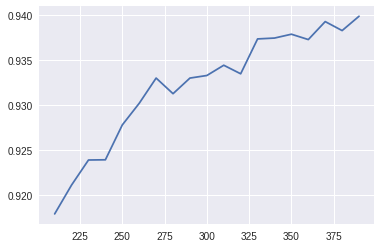

In [0]:
plt.plot(range(390,200,-10),score)
plt.show()

In [0]:
chivalue, pvalues_chi = chi2(X_fsvar,y)

In [0]:
chivalue

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

In [0]:
pvalues_chi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
chivalue.shape[0]

392

In [0]:
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()
k

392

In [0]:
#X_fschi = SelectKBest(chi2, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()


### F检验

需要注意的是，F检验在数据服从正态分布时效果会非常稳定，因此如果使用F检验过滤，我
们会先将数据转换成服从正态分布的方式

In [0]:
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(X_fsvar,y)

In [0]:
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [0]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [0]:
k = F.shape[0] - (pvalues_f > 0.05).sum()
k

392

In [0]:
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()

### 互信息法

返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间取值，为0则表示两个变量独立，为1则表示两个变量完全相关

In [0]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(X_fsvar,y)
k = result.shape[0] - sum(result <= 0)
k

392

In [0]:
#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()

## 3Embedded嵌入法

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
RFC_ = RFC(n_estimators =10,random_state=0)
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征只能够分到大约0.001的feature_importances_


In [0]:
X_embedded.shape

(42000, 47)

In [0]:
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值


In [0]:
threshold

array([0.        , 0.00067177, 0.00134354, 0.00201531, 0.00268707,
       0.00335884, 0.00403061, 0.00470238, 0.00537415, 0.00604592,
       0.00671769, 0.00738945, 0.00806122, 0.00873299, 0.00940476,
       0.01007653, 0.0107483 , 0.01142007, 0.01209183, 0.0127636 ])

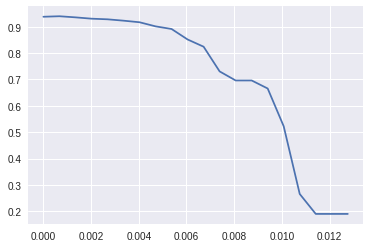

In [0]:
#======【TIME WARNING：10 mins】======#
import numpy as np
import matplotlib.pyplot as plt
RFC_.fit(X,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [0]:
X_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(X,y)
X_embedded.shape

(42000, 324)

In [0]:
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.939905083368037

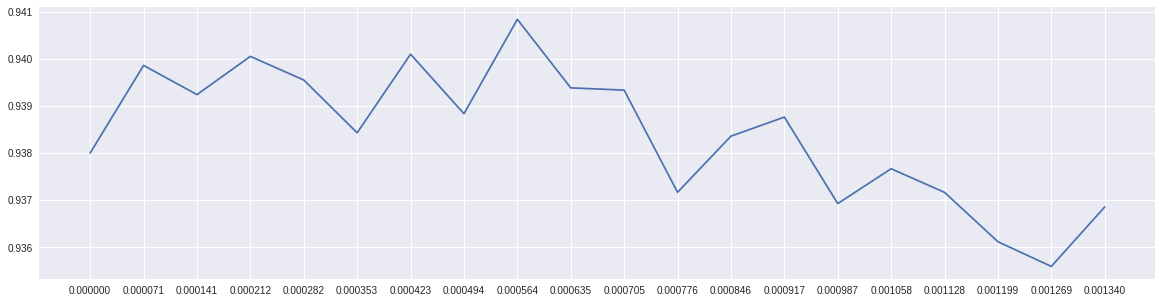

In [0]:
#======【TIME WARNING：10 mins】======#
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()

In [0]:
X_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(X,y)
X_embedded.shape


(42000, 340)

In [0]:
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9408335415056387

In [0]:
#=====【TIME WARNING：2 min】=====#
#我们可能已经找到了现有模型下的最佳结果，如果我们调整一下随机森林的参数呢？
cross_val_score(RFC(n_estimators=100,random_state=0),X_embedded,y,cv=5).mean()

0.960309871378534

## 4Wrapper包装法

In [0]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators =10,random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)


In [0]:
selector.support_.sum()

340

In [0]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [0]:
X_wrapper = selector.transform(X)
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9389522459432109

In [0]:
#======【TIME WARNING: 15 mins】======#
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()